In [ ]:
#default_exp iplotting

# Interactive plotting 

> The amazing possibilities of ipywidgets

The whole point of doing all this is of course to be able to communicate the results of data processing in as rich a manner as possible.  

In [ ]:
#hide 
%load_ext autoreload
%autoreload 2 
%matplotlib notebook

In [ ]:
# hide 
import os 
os.chdir('/home/frank/Work/Projecten/DoRe/viz/raw_nmf')

In [ ]:
#hide 
import numpy as np 
import matplotlib.pyplot as plt 
import skimage.exposure as ske

from maxrf4u import DataStack

We have saved the calculated element maps in our datastack file. First create a standard static plot. 

In [ ]:
from maxrf4u import multi_plot

<IPython.core.display.Javascript object>


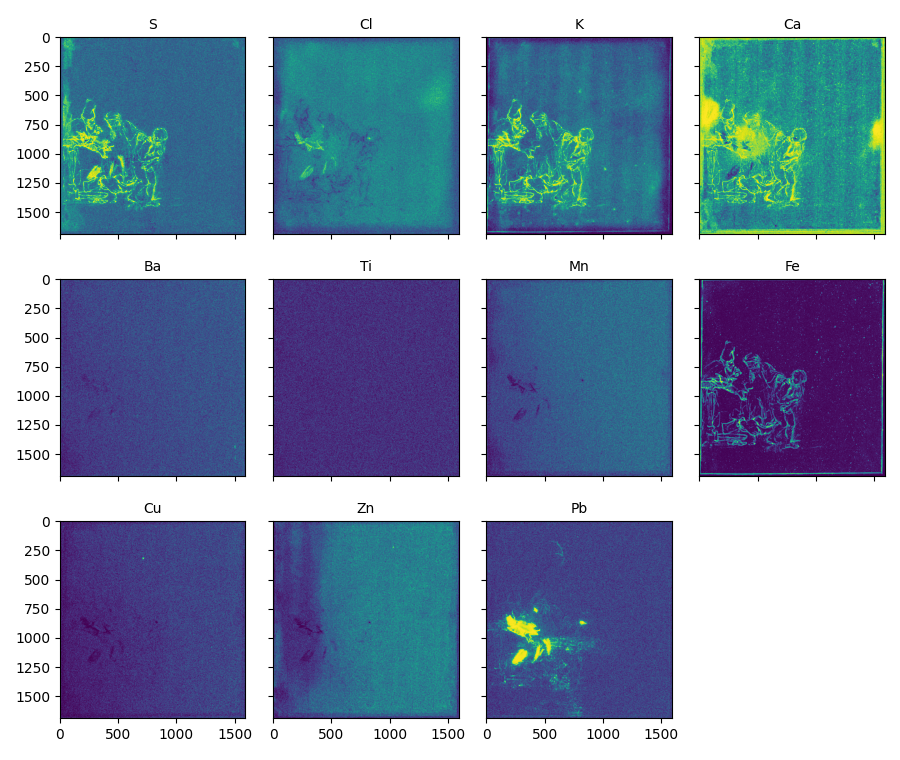

In [ ]:
ds = DataStack('RP-T-1898-A-3689.datastack')

elements = ds.read('nmf_elements')
element_maps = ds.read('nmf_elementmaps')
element_maps_histeq = [ske.equalize_hist(m) for m in element_maps]

multi_plot(*element_maps_histeq, titles=elements);

Not sure if this plot can also be exported...  

So let's see if we can plot them interactively. Let's first try the base64 approach. 

In [ ]:
from maxrf4u import img_to_url

In [ ]:
from ipyleaflet import Map, ImageOverlay 

In [ ]:
import json 

from IPython.display import display
from ipywidgets import Layout, HBox, VBox, GridBox, jslink, HTML
from ipyleaflet import (Map, projections, ImageOverlay, Rectangle, ZoomControl, FullScreenControl, 
                        DrawControl, WKTLayer, Popup)
from ipywidgets.embed import embed_minimal_html, embed_data 

In [ ]:
# map 1

url, shape = img_to_url(element_maps_histeq[0], max_width=500) # first trying small 

layout = Layout(width='300px', height='300px')
m = Map(center=[50, 50], zoom=2, crs=projections['Simple'], layout=layout, 
            scroll_wheel_zoom=True, interpolation='nearest')
imo = ImageOverlay(url=url, bounds=[[0, 0], [100, 100]], 
                   attribution='<a href="https://openheritagescience.org" target="_blank">RP-T-1898-A-3689</a> Madonna with child')
fsc = FullScreenControl()

m.add(imo)
m.add(fsc)
m.remove(m.layers[0]) # hack to remove world map 

m


Map(center=[50, 50], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…